# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Import-and-load-data" data-toc-modified-id="Import-and-load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import and load data</a></div><div class="lev2 toc-item"><a href="#Imports" data-toc-modified-id="Imports-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></div><div class="lev2 toc-item"><a href="#Load" data-toc-modified-id="Load-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load</a></div><div class="lev1 toc-item"><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem Statement</a></div><div class="lev2 toc-item"><a href="#Examine-the-data" data-toc-modified-id="Examine-the-data-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Examine the data</a></div><div class="lev2 toc-item"><a href="#Write-functions" data-toc-modified-id="Write-functions-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Write functions</a></div><div class="lev3 toc-item"><a href="#Transverse-Momentum" data-toc-modified-id="Transverse-Momentum-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Transverse Momentum</a></div><div class="lev4 toc-item"><a href="#Add-to-DataFrame" data-toc-modified-id="Add-to-DataFrame-2211"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Add to DataFrame</a></div><div class="lev3 toc-item"><a href="#Rapidity" data-toc-modified-id="Rapidity-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Rapidity</a></div><div class="lev4 toc-item"><a href="#Add-to-DataFrame" data-toc-modified-id="Add-to-DataFrame-2221"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span>Add to DataFrame</a></div><div class="lev3 toc-item"><a href="#Invariant-mass" data-toc-modified-id="Invariant-mass-223"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Invariant mass</a></div><div class="lev2 toc-item"><a href="#Plot-the-distributions" data-toc-modified-id="Plot-the-distributions-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot the distributions</a></div>

# Import and load data

## Imports

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


plt.rcParams.update({'font.family':'cmr10','font.size': 13})
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['axes.labelsize']=15
plt.rcParams['figure.figsize']=(4,4)

## Load

In [2]:
TotalSet = pd.read_csv('../Data/PracticeDataset.dat', index_col=0)

In [4]:
print ', '.join(TotalSet.columns)

e1, px1, py1, pz1, e2, px2, py2, pz2, type


How many different 'types' are there? Make a new DataFrame for each type

# Problem Statement

These data files contain the four-vectors for $p\bar{p} \rightarrow b\bar{b}$ collisions. We want to see if we can make cuts which will distinguish the two data sets. To do this, we are going to need to define functions which will add transverse momentum, rapidity, and invariant mass to our data tables. We are also going to want to plot the data.

## Examine the data

In [41]:
DF1.describe()

,e1,px1,py1,pz1,e2,px2,py2,pz2
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,383.831873,-0.206923,-0.035400,1.902207,228.134015,0.206923,0.035400,3.452655
std,532.591710,24.894383,24.755621,655.537854,347.885630,24.894383,24.755621,414.494289
min,4.866729,-55.904380,-56.460030,-4487.322713,5.123639,-58.142615,-56.217051,-4367.182120
25%,56.062120,-20.985931,-20.527712,-144.321602,46.457782,-20.338122,-20.555307,-88.673426
50%,149.870575,-0.342007,-0.235733,-0.955680,95.713317,0.342007,0.235733,0.650076
75%,492.355421,20.338122,20.555307,145.434683,250.499006,20.985931,20.527712,88.486945
max,4487.331244,58.142615,56.217051,4361.760256,4367.196821,55.904380,56.460030,3802.989172


In [42]:
DF2.describe()

,e1,px1,py1,pz1,e2,px2,py2,pz2
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,320.648543,-0.145971,-0.101480,-1.659961,320.471414,0.145971,0.101480,4.539662
std,484.657092,21.384376,21.400352,580.321447,482.569933,21.384376,21.400352,578.465905
min,4.909618,-58.167579,-58.702579,-4295.261719,5.052858,-58.953167,-58.333777,-4247.772589
25%,45.253404,-17.172721,-17.081240,-113.152260,45.889009,-16.796131,-16.699227,-112.305723
50%,116.585132,-0.216473,-0.206499,-0.134346,117.116937,0.216473,0.206499,-0.306893
75%,379.435399,16.796131,16.699227,111.391886,375.664524,17.172721,17.081240,112.908662
max,4295.354018,58.953167,58.333777,4204.867092,4247.796029,58.167579,58.702579,4013.222897


## Write functions

### Transverse Momentum

In [43]:
# write a function that takes in an object (which is a pandas Data Frame with 4 columns) 
# and outputs the transverse momentum
def make_pt(four_vector):
    '''four_vector is a DataFrame with columns in the shape of ['e', 'px', 'py', 'pz']
    the output should be a column matrix.    
    '''
    fv = four_vector.as_matrix()
    e = fv[:, 0]
    px = fv[:, 1]
    py = fv[:, 2]
    pz = fv[:, 3]
    
    pt = np.sqrt(px**2 + py**2)
    
    return pt

#### Add to DataFrame

Add a $p_T$ column to each of the data frames for the $b$ and $\bar{b}$

In [45]:
for df in DF1, DF2:
    df['pt1'] = make_pt(df[['e1', 'px1', 'py1', 'pz1']])
    df['pt2'] = make_pt(df[['e2', 'px2', 'py2', 'pz2']])

Check to see if it worked

In [47]:
DF1.sample(10)

,e1,px1,py1,pz1,e2,px2,py2,pz2,pt1,pt2
2760,526.971166,-38.572097,14.056320,525.348582,220.939165,38.572097,-14.056320,217.040637,41.053463,41.053463
12214,236.266853,28.993435,20.723233,233.516304,1048.507835,-28.993435,-20.723233,1047.891463,35.638065,35.638065
1571,341.243270,-0.644656,39.901757,338.869168,1003.281471,0.644656,-39.901757,1002.476460,39.906964,39.906964
2882,441.961097,43.124939,-14.091200,439.601182,595.977090,-43.124939,14.091200,594.229148,45.368737,45.368737
7912,30.876671,9.935279,-25.194558,-14.064256,76.643610,-9.935279,25.194558,71.544933,27.082753,27.082753
17693,603.587327,-26.255040,-24.631322,602.494434,161.590790,26.255040,24.631322,157.459405,36.000405,36.000405
16135,37.762098,34.427684,-5.641051,-13.667450,63.953807,-34.427684,5.641051,53.393937,34.886772,34.886772
18865,68.757420,-37.911840,14.511804,55.295504,156.397416,37.911840,-14.511804,150.964107,40.594335,40.594335
2226,1401.174324,-12.972081,-4.295441,-1401.099807,38.384133,12.972081,4.295441,-35.560174,13.664761,13.664761
15408,44.180051,34.577897,-20.030109,-18.246936,40.933737,-34.577897,20.030109,7.526260,39.960433,39.960433


### Rapidity

Now, let's do the same process, but for the rapidity of the particle. We will define rapidity as

\begin{equation}
y  = \frac{1}{2} \ln \left(\frac{E + p_z}{E - p_z} \right) \,.
\end{equation}
As we know, rapidity is useful because differences in rapidity, $\Delta y$ are invariant under longitudinal boosts.

In [50]:
# write a function that takes in an object (which is a pandas Data Frame with 4 columns) 
# and outputs the rapidity
def make_rapidity(four_vector):
    '''four_vector is a DataFrame with columns in the shape of ['e', 'px', 'py', 'pz']
    the output should be a column matrix.    
    '''
    fv = four_vector.as_matrix()
    e = fv[:, 0]
    px = fv[:, 1]
    py = fv[:, 2]
    pz = fv[:, 3]
    
    rap = 0.5 * np.log((e + pz) / (e - pz))
    
    return rap

In [49]:
np.log(np.e)

1.0

#### Add to DataFrame

In [51]:
for df in DF1, DF2:
    df['y1'] = make_rapidity(df[['e1', 'px1', 'py1', 'pz1']])
    df['y2'] = make_rapidity(df[['e2', 'px2', 'py2', 'pz2']])

Check that it worked

In [53]:
DF2.head(5)

,e1,px1,py1,pz1,e2,px2,py2,pz2,pt1,pt2,y1,y2
0,884.805200,31.188352,8.347662,884.203458,419.014867,-31.188352,-8.347662,417.742710,32.286170,32.286170,3.993051,3.244410
1,432.257221,-3.065846,-20.037100,431.756101,48.990128,3.065846,20.037100,44.351526,20.270293,20.270293,3.726248,1.500927
2,29.378031,23.089512,-17.516893,1.005776,38.125209,-23.089512,17.516893,-24.320248,28.982186,28.982186,0.034249,-0.754633
3,50.486271,34.269062,-3.224762,-36.633399,44.585954,-34.269062,3.224762,27.947265,34.420454,34.420454,-0.919395,0.736157
4,235.337888,34.836681,27.250223,231.096652,188.049015,-34.836681,-27.250223,182.713363,44.228599,44.228599,2.350131,2.120575


Did Madgraph impose any restrictions on the rapidity? Find the minimum and maximum rapidity in each sample for both the $b$ and $\bar{b}$.

In [55]:
DF2[['y1', 'y2']].describe()

,y1,y2
count,20000.000000,20000.000000
mean,-0.008315,0.006878
std,2.642076,2.640931
min,-6.963738,-7.369071
25%,-2.123454,-2.113931
50%,-0.005164,-0.013727
75%,2.107943,2.122989
max,6.784410,7.024007


In [56]:
DF1[['y1', 'y2']].describe()

,y1,y2
count,20000.000000,20000.000000
mean,-0.006796,0.010534
std,2.711301,2.202193
min,-6.982936,-6.647411
25%,-2.153611,-1.732666
50%,-0.030666,0.023227
75%,2.171802,1.742698
max,7.065231,6.684530


### Invariant mass
The invariant mass is defined as $p^2_4 = e^2 - p_3^2$. What we really want is the invariant mass of the s-channel propagator. Write two functions, one for the invariant mass of one particle, one for the invariant mass of the parent of two daughter particles.

In [60]:
# Invariant mass of one particle
def get_minv(four_vector):
    fv = four_vector.as_matrix()
    e = fv[:, 0]
    px = fv[:, 1]
    py = fv[:, 2]
    pz = fv[:, 3]
    
#     minv
    
    pass

In [72]:
# Invariant mass of two particles
def get_minv2(four_vector1, four_vector2):
    fv1 = four_vector1.as_matrix()
    e1 = fv1[:, 0]
    px1 = fv1[:, 1]
    py1 = fv1[:, 2]
    pz1 = fv1[:, 3]
    
    fv2 = four_vector2.as_matrix()
    e2 = fv2[:, 0]
    px2 = fv2[:, 1]
    py2 = fv2[:, 2]
    pz2 = fv2[:, 3]
    
    minv2 = (e1 + e2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2
    
    return np.sqrt(minv2)

In [73]:
for df in DF1, DF2:
    df['minv'] = get_minv2(df[['e1', 'px1', 'py1', 'pz1']],
                           df[['e2', 'px2', 'py2', 'pz2']]
                          )

## Plot the distributions

Get a list that has all of the columns in the data frame.

In [78]:
cols = DF1.columns
print ', '.join(cols)

e1, px1, py1, pz1, e2, px2, py2, pz2, pt1, pt2, y1, y2, minv


Use two for loops to plot histograms of all of the data

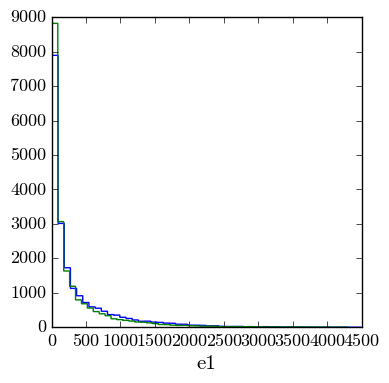

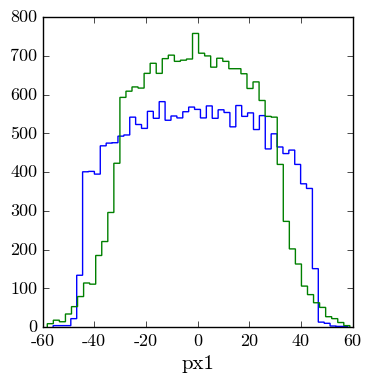

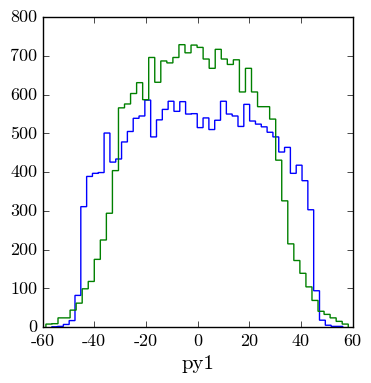

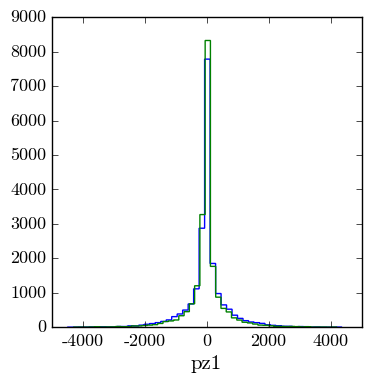

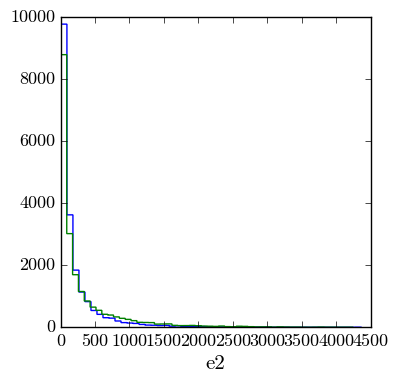

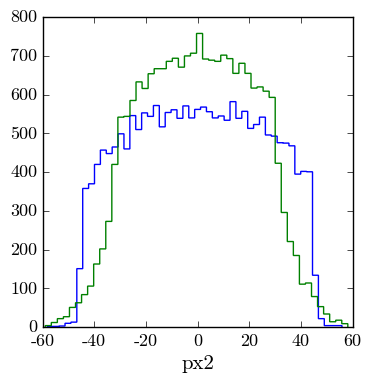

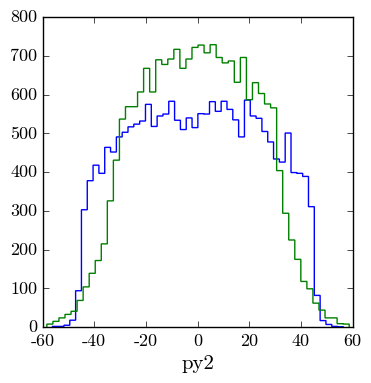

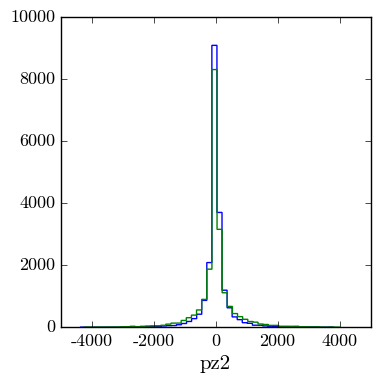

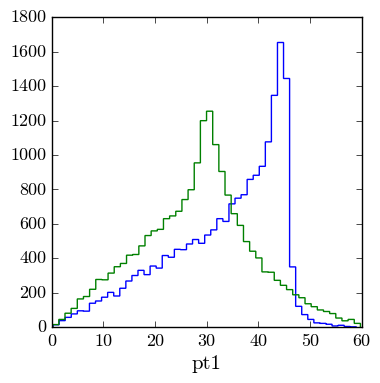

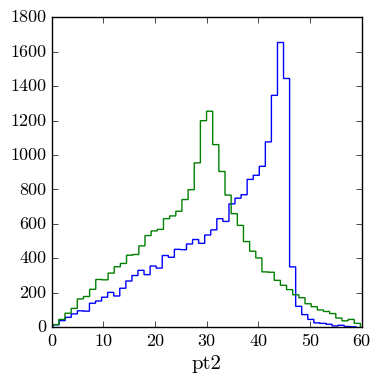

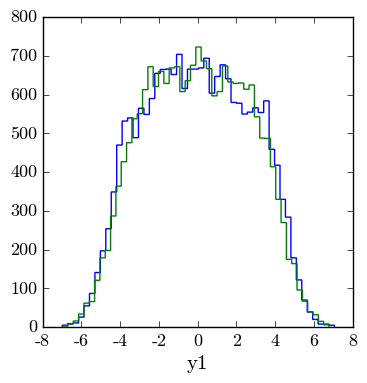

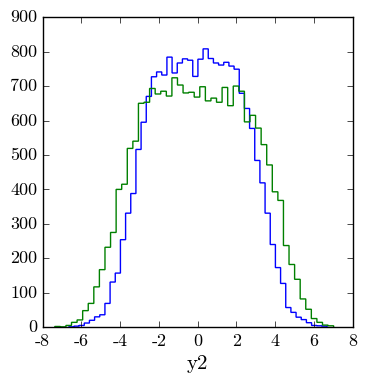

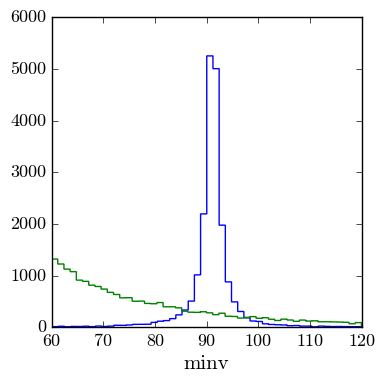

In [79]:
for column in cols:
    for df in DF1, DF2:
        plt.hist(df[column], histtype='step', bins=50)
    plt.xlabel(column)
    plt.show()   